In [1]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image # for reading images
# Keras Libraries <- CNN
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D,Flatten, Dense, Input, BatchNormalization, Concatenate, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
#from sklearn.metrics import classification_report, confusion_matrix # <- define evaluation metrics

2024-05-29 17:08:24.711649: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-29 17:08:24.711903: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 17:08:24.714230: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 17:08:24.743602: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 17:08:25.182918: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
main_dir = os.listdir("./chest_xray")
print(main_dir)

['test', 'train', 'val']


In [3]:
train_folder = "./chest_xray/train/"
test_folder = "./chest_xray/test/"
val_folder = "./chest_xray/val/"

In [4]:
#train
os.listdir(train_folder)
train_n = train_folder + "NORMAL/"
train_p = train_folder + "PNEUMONIA/"

# Normal piv 
print(len(os.listdir(train_n)))
rand_norm = np.random.randint(0, len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print("Normal picture title : ", norm_pic)
norm_pic_address = train_n + norm_pic

# Pneumonia
rand_p = np.random.randint(0, len(os.listdir(train_p)))
sic_pic = os.listdir(train_p)[rand_norm]
sic_address = train_p + sic_pic
print("Pneumonia picture title : ", sic_pic)

1341
Normal picture title :  NORMAL2-IM-0528-0001.jpeg
Pneumonia picture title :  person1730_bacteria_4558.jpeg


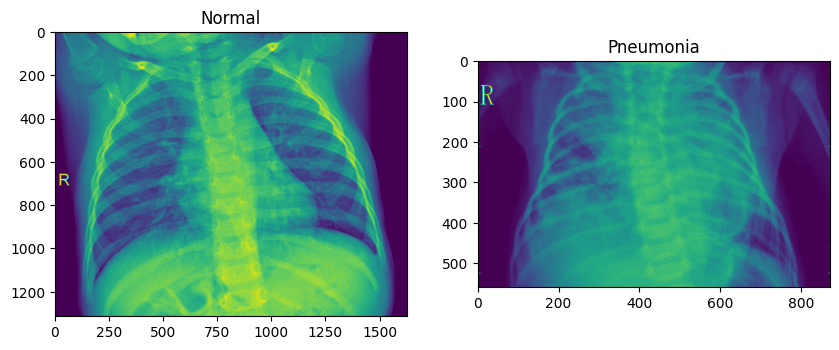

In [5]:
# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')
plt.show()
# let's build the CNN model

In [6]:
#cnn = Sequential()
#Convolution
model_in = Input(shape = (64, 64, 3))
model = Flatten()(model_in)

# Fully Connected Layers
model = Dense(activation = 'relu', units = 128) (model)
model = Dense(activation = 'sigmoid', units = 1)(model)

# Compile the Neural network
model_fin = Model(inputs=model_in, outputs=model)
model_fin.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [7]:
num_of_test_samples = 600
batch_size = 32


train_datagen =  ImageDataGenerator(rescale=1./255, shear_range = 0.2, 
                                    zoom_range = 0.2, horizontal_flip = True)

test_datagen =  ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory("./chest_xray/train", target_size = (64, 64), 
                                                 batch_size = 32, class_mode = "binary")

Found 5216 images belonging to 2 classes.


In [8]:
valid_generator = test_datagen.flow_from_directory("./chest_xray/val", target_size = (64, 64), 
                                                  batch_size = 32, class_mode = "binary")

test_set = test_datagen.flow_from_directory("./chest_xray/test", target_size = (64, 64), 
                                            batch_size = 32, class_mode = "binary")

Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [16]:
history = model_fin.fit(training_set, epochs=10, steps_per_epoch=163, 
              validation_data=valid_generator, validation_steps=624)
model_fin.save('medical_model.h5')

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - accuracy: 0.8811 - loss: 0.2879 - val_accuracy: 0.7500 - val_loss: 0.4187
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.4187
Epoch 3/10


2024-05-29 17:11:36.071723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:11:36.078170: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:11:36.157965: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - accuracy: 0.8906 - loss: 0.2592 - val_accuracy: 0.6875 - val_loss: 0.5578
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.5578
Epoch 5/10


2024-05-29 17:11:58.766575: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:11:58.773184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:11:58.847805: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - accuracy: 0.9007 - loss: 0.2459 - val_accuracy: 0.8125 - val_loss: 0.4363
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.4363
Epoch 7/10


2024-05-29 17:12:21.456471: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:12:21.463322: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:12:21.536531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.8918 - loss: 0.2519 - val_accuracy: 0.8750 - val_loss: 0.4869
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.4869
Epoch 9/10


2024-05-29 17:12:43.960776: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:12:43.967193: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:12:44.053768: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - accuracy: 0.8948 - loss: 0.2596 - val_accuracy: 0.6875 - val_loss: 0.6087
Epoch 10/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.6087


2024-05-29 17:13:06.664914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:13:06.671194: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:13:06.752501: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [17]:
test_accu = model_fin.evaluate(test_set,steps=624)
print('The testing accuracy is :',test_accu[1]*100, '%')

624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7911 - loss: 0.4716  
The testing accuracy is : 79.00640964508057 %


2024-05-29 17:13:08.991178: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


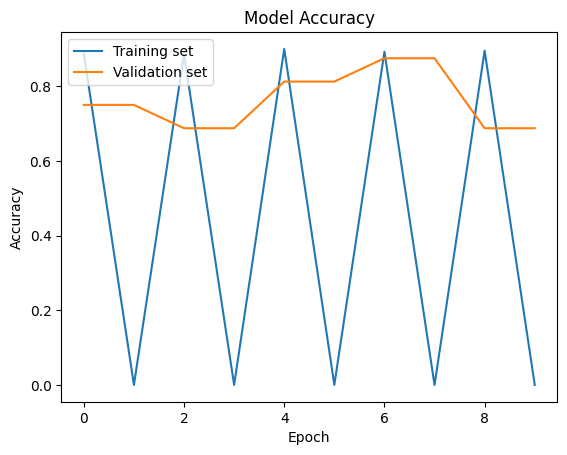

<Figure size 640x480 with 0 Axes>

In [18]:
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.savefig('train_accuracy.png')
plt.show(block=False)
plt.clf()

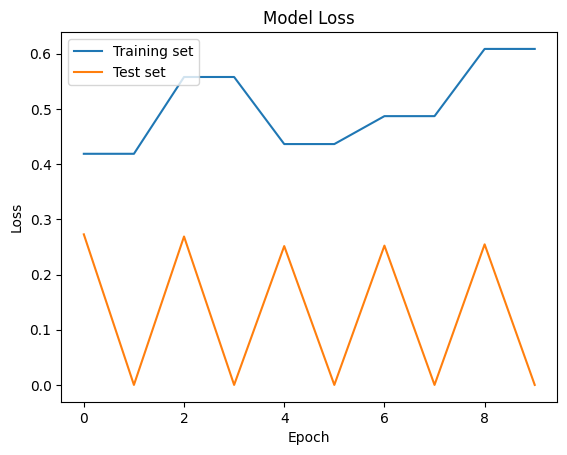

<Figure size 640x480 with 0 Axes>

In [19]:
# Loss
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'],
loc='upper left')
plt.savefig('train_loss.png')
plt.show(block=False)
plt.clf()